#### Import modules

In [1]:
# !pip install pandas_datareader
# !pip install scipy
# !pip install --upgrade tensorflow
# !pip install plotly
# !pip install pycirclize
# !pip install chord

In [2]:
import pandas as pd
import datetime as dt 
import yfinance as yf
import json
from requests import Session
import requests
from requests_cache import CacheMixin, SQLiteCache
from requests_ratelimiter import LimiterMixin, MemoryQueueBucket
from pyrate_limiter import Duration, RequestRate, Limiter
class CachedLimiterSession(CacheMixin, LimiterMixin, Session):
    pass
import requests_cache
import numpy as np
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.optimize as sc
from scipy.cluster.hierarchy import fcluster
from pycirclize import Circos
from IPython.display import Image
import holoviews as hv
import hvplot.pandas
from bokeh.io import output_notebook
from bokeh.models import HoverTool
from scipy.optimize import minimize
import plotly.graph_objects as go
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import math
from sklearn.metrics import mean_squared_error

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('fivethirtyeight')
from numpy.random import default_rng

In [3]:
# Read saved date base

sp500_history = pd.read_csv("/Users/rtasseff/projects/tmp/data_analytics_v1/sp500_10y.csv")

In [4]:
# sp500_history has over 4 million rows

sp500_history.head()

Date        Open        High         Low       Close  Adj Close  \
0  2014-04-01  113.612038  114.255852  113.436455  114.155518  76.270012   
1  2014-04-02  113.704010  113.921402  113.152176  113.712372  75.973930   
2  2014-04-03  113.896324  114.707359  113.461540  113.829430  76.052124   
3  2014-04-04  114.464882  115.192307  113.520065  113.595322  75.895737   
4  2014-04-07  113.553513  113.921402  112.366219  112.374580  75.080139   

      Volume Symbol  
0  2835477.0    MMM  
1  3924554.0    MMM  
2  3200735.0    MMM  
3  3271419.0    MMM  
4  3357770.0    MMM

In [5]:
# Convert date column to datetime

sp500_history['Date'] = pd.to_datetime(sp500_history['Date'])

In [6]:
# Set 'Date' as index

sp500_history.set_index('Date', inplace=True)

In [7]:
sp500_history.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1226068 entries, 2014-04-01 to 2024-03-28
Data columns (total 7 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Open       1226068 non-null  float64
 1   High       1226068 non-null  float64
 2   Low        1226068 non-null  float64
 3   Close      1226068 non-null  float64
 4   Adj Close  1226068 non-null  float64
 5   Volume     1226068 non-null  float64
 6   Symbol     1226068 non-null  object 
dtypes: float64(6), object(1)
memory usage: 74.8+ MB


### Stock Market Investing for the Layperson
credit: Javier S Bris

Modern Portfolio Theory is a concept in Finance that describes ways of diversifying and allocating assets in a financial portfolio in order to maximize the portfolio's expected return given the owner's risk tolerance. American economist Harry Markowitz first introduced MPT in a 1952 paper. The theory was intended to eliminate ideosyncratic risk, which is the risk inherent in a particular investment due to its unique characteristics.

A key component of this framework is diversification. When using MPT, an investor bundles different types of investments together so that when some of the securities fall in value, other securities rise in equal amount. Thus, the overall portfolio stays even but as markets rise overall, the portfolio rises along with the market's inside tide.

MPT argues that any given investment's risk and return characteristics should not be viewed alone but evaluated by how it affects the overall portfolio's risk and return. That is, an investor can construct a portfolio of multiple assets that will result in greater returns without a higher level of risk. As an alternative, starting with a desired level of expected return, the investor can construct a portfolio with the lowest possible risk that is capable of producing that return.

MPT uses precise financial mathematics to carefully construct the portfolio. The steps involved included:

Valuing the securities that might be included in the portfolio.
Calculating the desired asset allocation, that is, the mix of assets.
Performing calculations to optimize the portfolio to get the maximum amount of return for the minimum amount of risk.
Using financial analysis to monitor the portfolio to see if it meets expectations and then making changes to the individual securities or asset mix when market warrant a change.


Valuing the securities that might be included in the portfolio.
Calculating the desired asset allocation, that is, the mix of assets.
Performing calculations to optimize the portfolio to get the maximum amount of return for the minimum amount of risk.
Using financial analysis to monitor the portfolio to see if it meets expectations and then making changes to the individual securities or asset mix when market warrant a change.
An important consideration in MPT is that based on statistical measures such as variance and correlation, a single investment's performance is less important than how it impacts the entire portfolio.

MPT also assumes that investors are risk-averse, meaning that they prefer a less risky portfolio to a riskier one for a given level of return. As a practical matter, risk aversion implies that most people should invest in multiple asset classes (stocks, bonds, commodities, cash equivalents or cryptocurrencies for example).

#### Portfolio Example

The expected return of the portfolio is calculated as a weighted sum of the returns of the individual assets:

𝐸(𝑅𝑝)=∑𝑖=1𝑛𝑤𝑖𝐸(𝑅𝑖) 

Where:

𝐸(𝑅𝑝)  is the expected return of the portfolio.
𝑤𝑖  is the weight of asset  𝑖  in the portfolio.
𝐸(𝑅𝑖)  is the expected return of asset  𝑖 .
𝑛  is the number of assets in the portfolio.

Let's imagine a portfolio contains four assets with the following characteristics:

Asset 1: Weight = 20%. Expected Return = 4%. Volatility (σ1) = 5%
Asset 2: Weight = 30%. Expected Return = 6%. Volatility (σ2) = 7%
Asset 3: Weight = 25%. Expected Return = 10%. Volatility (σ3) = 10%
Asset 4: Weight = 25%. Expected Return = 14%. Volatility (σ4) = 15%
The expected return of the portfolio is calculated as follows:

𝐸(𝑅𝑝)=(0.04×0.20)+(0.06×0.30)+(0.10×0.25)+(0.14×0.25) 

Simplifying the calculation:

𝐸(𝑅𝑝)=0.008+0.018+0.025+0.035=0.086or8.6% 

Therefore, the expected return of the portfolio is:

𝐸(𝑅𝑝)=0.086or8.6%


### Portfolio risk

The portfolio's risk is a function of the variances of each asset and the correlations of each pair of assets. Following the previous example, to calculate the risk of the portfolio, an investor needs each of the four assets' variances and six correlation values, since there are six possible two-asset combinations with four assets. The variance of the portfolio is given by:

𝜎2𝑝=∑𝑖=1𝑛∑𝑗=1𝑛𝑤𝑖𝑤𝑗𝜎𝑖𝑗 

Where:

𝜎2𝑝  is the variance of the portfolio.
𝑤𝑖  and  𝑤𝑗  are the weights of assets  𝑖  and  𝑗  in the portfolio.
𝜎𝑖𝑗  is the covariance between the returns of assets  𝑖  and  𝑗 .
The standard deviation (risk) of the portfolio is the square root of the variance or the standard deviation:

𝜎𝑝=∑𝑖=1𝑛∑𝑗=1𝑛𝑤𝑖𝑤𝑗𝜎𝑖𝑗‾‾‾‾‾‾‾‾‾‾‾‾‾‾⎷ 

Standard deviation is used instead of variance as it's in the same units as the assets' returns and can be utilized in calculating risk-adjusted measures. Another reason is because in the context of Finance, returns are often assumed to be normally distributed. In this distribution, about 68% of the data falls within one standard deviation of the mean and about 95% falls within two standard deviations. This property is important to understand the probability of different return outcomes.

Also, MPT and other portfolio optimization techniques such as the efficient frontier are commonly formulated in terms of standard deviation because this optimization seeks to balance returns against risk in a way that is more meaningful when risk is measured in the same units as the return.

In addition, it should be noted that because of the asset correlations, the total portfolio risk is lower than what would be calculated by a weighted sum.

Following the previous example, the variance calculation involves:

Variances of individual assets (on the diagonal):
𝜎11=𝜎12=0.052=0.0025𝜎22=0.072=0.0049𝜎33=𝜎32=0.102=0.01𝜎44=𝜎42=0.152=0.0225

Covariances of pairs of assets (off-diagonal elements):
𝜎12=𝜎21=0.0006𝜎13=𝜎31=0.0008𝜎14=𝜎41=0.0010𝜎23=𝜎32=0.0012𝜎24=𝜎42=0.0014𝜎34=𝜎43=0.0020

Substituting these values into the variance formula:

𝜎2𝑝=(0.202⋅0.0025)+(0.302⋅0.0049)+(0.252⋅0.01)+(0.252⋅0.0225)+2⋅0.20⋅0.30⋅0.0006+2⋅0.20⋅0.25⋅0.0008+2⋅0.20⋅0.25⋅0.0010+2⋅0.30⋅0.25⋅0.0012+2⋅0.30⋅0.25⋅0.0014+2⋅0.25⋅0.25⋅0.0020=0.0001+0.000441+0.000625+0.00140625+0.000072+0.00008+0.0001+0.00009+0.000105+0.000125=0.00214425

The portfolio standard deviation 𝜎𝑝 is the square root of the variance:

𝜎𝑝=0.00214425‾‾‾‾‾‾‾‾‾‾‾√≈0.0463or4.63%

Efficient Frontier and Capital Allocation Line
According to the MPT, a portfolio frontier, also known as an efficient frontier, is a set of portfolios that maximizes expected returns for each level of standard deviation (risk). As we've seen, the expected return is the weighted sum of the individual assets' returns, whereas the standard deviation is the level of risk associated to an asset (also called volatility in Finance).

Associated to risk, there is the risk-free rate, which is the return an investor expects to earn on an asset with zero risk. Although every asset has a certain level of risk, assets with low probability of default and fixed returns (treasury bills for example) are considered risk-free.

Efficient Frontier
In the above image, the upper portion of the curve is what is the "Efficient Frontier" that is, the combination of risky-assets that maximizes expected return for a given level of stardard deviation. Therefore, any portfolio on this portion of the curve offers the best possible expected returns for a given level of risk.

Point A on the efficient frontier is the minimum variance portfolio, the combination of risky assets that minimizes risk.
Point B is the optimal market portfolio, which consists of at least one risk-free asset. It is depicted by the line that is tangent to the efficient frontier. This line is also called Capital Allocation Line or CAL.
The CAL is a line that depicts the risk-rewarded tradeoff of assets that carry risk. The slope of this line is called the Sharpe ratio, and can be defined as the increase in expected return per additional unit of standard deviation. In the above image, at point B, the reward-to-risk ratio (the slope of CAL) is the highest, and it's the combination that creates the optimal portfolio according to the MPT.

As a summary, according to the MPT, rational risk-averse investors should hold portfolios that fall on the efficient frontier (since they all provide the highest possible expected returns for a given level of risk). The optimal portfolio (also called market portfolio) is the combination of assets at point B, which combines one risk-free asset with one risky asset.

Risk-adjusted measures
As we've seen, the Sharpe Ratio is a measure of the risk-adjusted return of the portfolio, and can be calculated as follows:

Sharpe Ratio=𝐸(𝑅𝑝)−𝑅𝑓𝜎𝑝

Where:

𝐸(𝑅𝑝) is the expected return of the portfolio.
𝑅𝑓 is the risk-free rate.
𝜎𝑝 is the standard deviation of the portfolio.
Following the example portfolio, if we substitute the values in the formula, we obtain the following:

Sharpe Ratio=0.085−0.030.0463=0.0550.0463≈1.187

Therefore, the Sharpe Ratio of the portfolio is approximately 1.187. It's common ground in Finance to consider a Sharpe ratio greater than 1 acceptable. Portfolios with a lower ratio don't compensate the level of risk taken. The greater the ratio, the more return the portfolio will yield on a risk-adjusted basis.

# Part1: Correlation
Correlations help us to find the best assets that are least correlated. This is a key part of diversification as the portfolio should be flexible enough to compensate highs in one asset with lows in another.

In [8]:
# Read saved date base

df_part1 = pd.read_csv("/Users/rtasseff/projects/tmp/data_analytics_v1/sp500_combined.csv")

In [9]:
# Convert 'Date' column to datetime
df_part1['Date'] = pd.to_datetime(df_part1['Date'])  

# Set 'Date' column as index
df_part1.set_index('Date', inplace=True)  

In [10]:
# Select the columns for the correlations

selected_columns = ['GICS Sector', 'Symbol', 'Adj Close']
df_part1 = df_part1[selected_columns]
df_part1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1226068 entries, 2014-04-01 to 2024-03-28
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   GICS Sector  1226068 non-null  object 
 1   Symbol       1226068 non-null  object 
 2   Adj Close    1226068 non-null  float64
dtypes: float64(1), object(2)
memory usage: 37.4+ MB


In [11]:
# Create a column for the calculated log value of the Adjusted Closing Price

df_part1['Log_Adj_Close'] = np.log(df_part1['Adj Close'])
df_part1.head()

GICS Sector Symbol  Adj Close  Log_Adj_Close
Date                                                    
2014-04-01  Industrials    MMM  76.270012       4.334280
2014-04-02  Industrials    MMM  75.973930       4.330390
2014-04-03  Industrials    MMM  76.052124       4.331419
2014-04-04  Industrials    MMM  75.895737       4.329361
2014-04-07  Industrials    MMM  75.080139       4.318556

In [12]:
# Pivot the dataframe to show the 'Date' as the index for timeseries data
# columns as "GICS Sector", values are Log_adj_close column and aggregate 
#the mean of the Log_adj_close per daily value 

pivot_df = df_part1.pivot_table(index='Date', columns='GICS Sector', values='Log_Adj_Close', aggfunc='mean')
pivot_df.head()

GICS Sector  Communication Services  Consumer Discretionary  Consumer Staples  \
Date                                                                            
2014-04-01                 3.423455                3.996665          3.635249   
2014-04-02                 3.423211                4.001898          3.635293   
2014-04-03                 3.414846                3.996290          3.638149   
2014-04-04                 3.395996                3.977981          3.630151   
2014-04-07                 3.380499                3.957151          3.629783   

GICS Sector    Energy  Financials  Health Care  Industrials  \
Date                                                          
2014-04-01   3.838805    3.690468     4.009264     3.870418   
2014-04-02   3.843113    3.692476     4.014550     3.875537   
2014-04-03   3.847506    3.691130     4.012202     3.874369   
2014-04-04   3.841237    3.674558     3.991284     3.858754   
2014-04-07   3.821653    3.654642     3.977089     3.841824   

GICS Sector  Information Technology  Materials  Real Estate  Utilities  
Date                                                                    
2014-04-01                 3.501336   3.826890     3.726187   3.305446  
2014-04-02                 3.503208   3.833971     3.725508   3.305085  
2014-04-03                 3.492563   3.833614     3.722461   3.308434  
2014-04-04                 3.469738   3.825446     3.721972   3.313790  
2014-04-07                 3.456560   3.809128     3.721574   3.309408

In [13]:
# Calculate log returns
log_returns = np.log(pivot_df / pivot_df.shift(1))

# Drop the first row as it contains NaN values due to the shift
log_returns = log_returns.dropna()


In [14]:
# Compute the Correlation Matrix

correlation_matrix = log_returns.corr()
print(correlation_matrix.info())

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, Communication Services to Utilities
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Communication Services  11 non-null     float64
 1   Consumer Discretionary  11 non-null     float64
 2   Consumer Staples        11 non-null     float64
 3   Energy                  11 non-null     float64
 4   Financials              11 non-null     float64
 5   Health Care             11 non-null     float64
 6   Industrials             11 non-null     float64
 7   Information Technology  11 non-null     float64
 8   Materials               11 non-null     float64
 9   Real Estate             11 non-null     float64
 10  Utilities               11 non-null     float64
dtypes: float64(11)
memory usage: 1.3+ KB
None


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
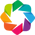

Loading BokehJS ...

:Chord   [source,target]   (value,source_highest,source_lowest,target_highest,target_lowest)

In [15]:
# Initialize Holoviews
hv.extension('bokeh')
output_notebook()

sectors = ['Information Technology', 'Health Care', 'Financials', 'Consumer Discretionary', 'Industrials', 'Communication Services', 'Consumer Staples', 'Energy', 'Materials', 'Real Estate', 'Utilities']
correlation_data = np.random.rand(len(sectors), len(sectors))
np.fill_diagonal(correlation_data, 1)
correlation_matrix_df = pd.DataFrame(correlation_data, index=sectors, columns=sectors)

# Ensure that the index and columns of the DataFrame match
if not set(correlation_matrix_df.index) == set(correlation_matrix_df.columns):
    raise ValueError("Index and columns of the correlation matrix must match.")

# Prepare the DataFrame suitable for a chord diagram
data = []

for i, sector1 in enumerate(correlation_matrix_df.index):
    for j, sector2 in enumerate(correlation_matrix_df.columns):
        if i != j:
            try:
                value = correlation_matrix_df.at[sector1, sector2]
                data.append([sector1, sector2, value])
            except KeyError as e:
                print(f"KeyError: {e}")

df = pd.DataFrame(data, columns=['source', 'target', 'value'])

# Check if the DataFrame was created successfully
if df.empty:
    raise ValueError("The DataFrame for the chord diagram is empty. Please check the input correlation matrix.")

# Find the highest and lowest correlations for each sector
highest_correlation = correlation_matrix_df.replace(1, np.nan).max(axis=1)
lowest_correlation = correlation_matrix_df.replace(1, np.nan).min(axis=1)

# Create a dictionary for tooltip information
tooltip_info = {sector: (f'Highest: {highest_correlation[sector]:.2f}', f'Lowest: {lowest_correlation[sector]:.2f}')
                for sector in correlation_matrix_df.index}

# Add tooltip information to the DataFrame
df['source_highest'] = df['source'].map(lambda x: tooltip_info[x][0])
df['source_lowest'] = df['source'].map(lambda x: tooltip_info[x][1])
df['target_highest'] = df['target'].map(lambda x: tooltip_info[x][0])
df['target_lowest'] = df['target'].map(lambda x: tooltip_info[x][1])

# Create a chord diagram using Holoviews
chord = hv.Chord(df)
chord.opts(
    width=800, height=800,
    labels='index',
    node_color='index',
    cmap='Category20',
    edge_color='value',
    edge_cmap='Category20',
    edge_line_width=2,
    tools=['hover'],
    inspection_policy='edges',
    edge_hover_line_color='black',
    node_hover_line_color='black',
)

# Customize hover tool to show highest and lowest correlations
hover = HoverTool(tooltips=[
    ('Source', '@source'),
    ('Target', '@target'),
    ('Value', '@value{0.00}'),
    ('Source Highest', '@source_highest'),
    ('Source Lowest', '@source_lowest'),
    ('Target Highest', '@target_highest'),
    ('Target Lowest', '@target_lowest')
])

# Show the chord diagram with the hover tool
plot = hv.render(chord)
plot.add_tools(hover)

hv.output(chord)


#### Top 2 companies per sector: 
Info Tech: Apple and Microsoft

Health Care: United Health Group and Johnson & Johnson

Financials: Berkshire Hathaway and JP Morgan Chase

Consumer Discretionary: Amazon and Tesla

etc...
link to source
https://www.visualcapitalist.com/complete-breakdown-of-sp-500-companies/

### Pairwise conclusion:

Using pairwise correlation, we can calculate the mean log of the Adjusted closing price over the last 10 years. Using these correlations, we create a matrix that can visualize which sectors are the least correlated. Using these diagram above if we want to invest in Sector A, Sector B and Sector C, we can check if they are strongly or weakly correlated so that we can have the best diversified portfolio. 

# Part2: EFFICIENT FRONTIER

Now that we know which sectors are weakly correlated, we select the assets from those sectors that will make up our portfolio. 

In [16]:
# get data, return only the adjusted close of stocks

df = pd.read_csv("/Users/rtasseff/projects/tmp/data_analytics_v1/sp500_combined.csv")

# prepare data so the colums is the assets and the values are the adj closing price

pivot_df = df.pivot_table(index='Date', columns='Symbol', values='Adj Close')

# Drop any columns with NAN values

stockdata_base = pivot_df.dropna()
stockdata_base.head()

Symbol               A    AAL        AAPL        ABBV        ABNB        ABT  \
Date                                                                           
2023-10-04  111.300636  12.73  172.975876  143.502319  127.410004  94.198936   
2023-10-05  109.985001  12.85  174.220963  143.269104  124.989998  94.740585   
2023-10-06  110.274040  12.76  176.790787  144.036713  126.360001  95.410263   
2023-10-09  110.911919  12.24  178.284882  144.882034  127.769997  95.292091   
2023-10-10  112.915276  12.26  177.687241  144.668274  131.589996  96.079948   

Symbol           ACGL         ACN        ADBE         ADI  ...         WTW  \
Date                                                       ...               
2023-10-04  80.459999  305.807007  518.419983  172.163712  ...  207.200500   
2023-10-05  81.639999  306.073853  516.440002  170.489532  ...  207.180634   
2023-10-06  82.180000  308.574585  526.679993  172.342026  ...  207.776596   
2023-10-09  82.070000  308.396637  529.289978  171.698120  ...  207.637527   
2023-10-10  81.860001  308.703064  532.719971  174.323318  ...  207.061432   

Symbol             WY       WYNN        XEL         XOM        XYL  \
Date                                                                 
2023-10-04  29.433392  87.745781  55.559395  108.590233  90.658012   
2023-10-05  29.541639  89.019051  55.412228  106.145729  89.584656   
2023-10-06  29.344826  91.923683  56.265778  104.373230  90.409546   
2023-10-09  29.453074  92.580208  56.560108  108.025368  90.528801   
2023-10-10  29.630205  93.495369  56.962357  107.567635  91.383514   

Symbol             YUM         ZBH        ZBRA         ZTS  
Date                                                        
2023-10-04  122.336212  109.266174  230.940002  169.711670  
2023-10-05  120.662544  108.877678  222.539993  170.714127  
2023-10-06  118.305550  110.481461  223.850006  174.267365  
2023-10-09  117.760864  110.262314  222.580002  173.294693  
2023-10-10  119.206757  111.756508  222.399994  174.316986  

[5 rows x 499 columns]

In [40]:
# get the assets you want to work 
# 3 assets with low pairwise correlations for best diversification

stocklist = ["MSFT", "NEE", "CVX"]

# subset stockdata_base to the 3 assets
stockdata = stockdata_base[stocklist]
stockdata.head()

Symbol            MSFT        NEE         CVX
Date                                         
2023-10-04  317.154327  49.755985  159.607071
2023-10-05  317.552032  48.605957  160.448959
2023-10-06  325.407349  49.382477  158.814133
2023-10-09  327.952850  48.478176  163.209595
2023-10-10  326.530945  50.699604  163.033386

In [18]:
# calculate the returns

returns = np.log(stockdata / stockdata.shift(1)).dropna()
# returns = stockdata.pct_change().dropna()

# calculate meanReturns

meanReturns = returns.mean()

# calculate covMatrix

covMatrix = returns.cov()

##### Explanation of the efficiency frontier code

using SciPy minimization operations, we can minimize the negative sharpe ratio which is an equivalency statemento of optimizing the positive sharpe ratio.

In Portfolio Diversification and Risk Management Log returns facilitate the measurement of risk and correlation between assets, which is crucial for portfolio diversification. The properties of log returns make it easier to apply risk management techniques, such as Value at Risk (VaR) and stress testing.

We are using Log returns instead of percentage returns:

Log returns are a common way to measure the performance of an investment because they are additive over time. if you have two log returns, you can add them together to get the total log return for the period.

Another advantage is that they are symmetric around zero.

That is, positive and negative log returns are equally far from zero on a logarithmic scale. making it easy to compare their performance.

A third advantage of using log returns(and this is more of an assumption) is that they are following approximately a normal distribution, which makes it convenient to analyze and model using statistical methods.

the riskFreeRate=.03 but it is a key parameter to optimizing portfolios, based on Syds Intro. The reason for .03 riskFreerate... this is the standard rate that is expected for the US Treasury Bill return = 0 volatility (std), 3% on the US Treasury Bill.

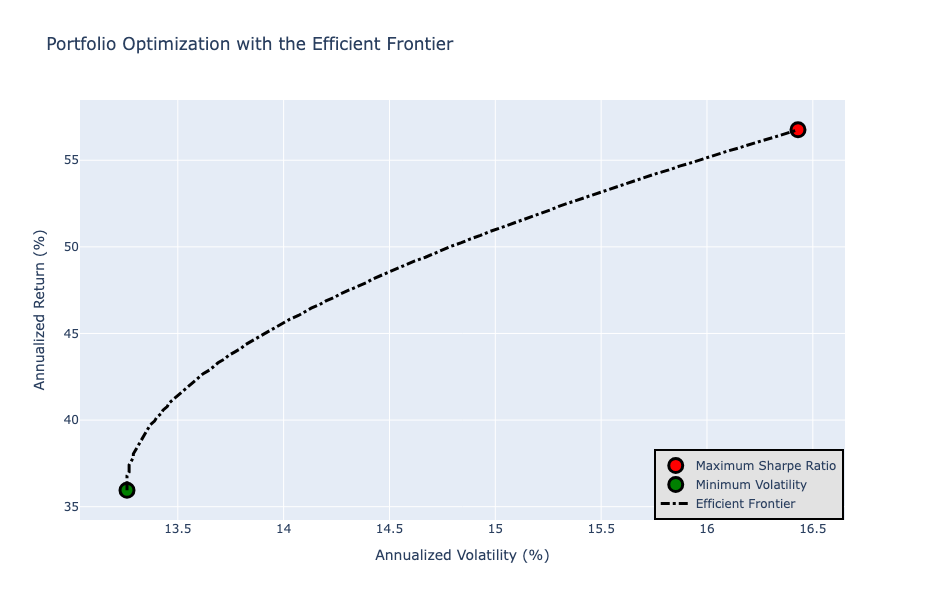

In [19]:
# Function to calculate portfolio performance (daily basis)
def portfolioPerformance(weights, meanReturns, covMatrix, annualize=True):
    returns = np.sum(meanReturns * weights)
    std = np.sqrt(np.dot(weights.T, np.dot(covMatrix, weights)))
    if annualize:
        returns *= 252
        std *= np.sqrt(252)
    return returns, std

# Function to calculate negative Sharpe ratio
def negativeSR(weights, meanReturns, covMatrix, riskFreeRate=.03, annualize=True):
    pReturns, pStd = portfolioPerformance(weights, meanReturns, covMatrix, annualize)
    return - (pReturns - riskFreeRate) / pStd

# Function to maximize Sharpe ratio
def maxSR(meanReturns, covMatrix, riskFreeRate=.03, constraintSet=(0, 1), annualize=True):
    numAssets = len(meanReturns)
    args = (meanReturns, covMatrix, riskFreeRate, annualize)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple(constraintSet for asset in range(numAssets))
    result = sc.minimize(negativeSR, numAssets * [1. / numAssets], args=args,
                         method='SLSQP', bounds=bounds, constraints=constraints)
    return result

# Function to calculate portfolio variance
def portfolioVariance(weights, meanReturns, covMatrix, annualize=True):
    return portfolioPerformance(weights, meanReturns, covMatrix, annualize)[1]

# Function to minimize portfolio variance
def minimizeVariance(meanReturns, covMatrix, constraintSet=(0, 1), annualize=True):
    numAssets = len(meanReturns)
    args = (meanReturns, covMatrix, annualize)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple(constraintSet for asset in range(numAssets))
    result = sc.minimize(portfolioVariance, numAssets * [1. / numAssets], args=args,
                         method='SLSQP', bounds=bounds, constraints=constraints)
    return result

# Function to calculate portfolio return
def portfolioReturn(weights, meanReturns, covMatrix, annualize=True):
    return portfolioPerformance(weights, meanReturns, covMatrix, annualize)[0]

# Function to optimize the portfolio for a target return
def efficientOpt(meanReturns, covMatrix, returnTarget, constraintSet=(0, 1), annualize=True):
    numAssets = len(meanReturns)
    args = (meanReturns, covMatrix, annualize)
    constraints = ({'type': 'eq', 'fun': lambda x: portfolioReturn(x, meanReturns, covMatrix, annualize) - returnTarget},
                   {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple(constraintSet for asset in range(numAssets))
    effOpt = sc.minimize(portfolioVariance, numAssets * [1. / numAssets], args=args,
                         method='SLSQP', bounds=bounds, constraints=constraints)
    return effOpt

# Function to calculate results for plotting
def calculatedResults(meanReturns, covMatrix, riskFreeRate=.03, constraintSet=(0, 1), annualize=True):
    maxSR_Portfolio = maxSR(meanReturns, covMatrix, riskFreeRate, constraintSet, annualize)
    maxSR_returns, maxSR_std = portfolioPerformance(maxSR_Portfolio['x'], meanReturns, covMatrix, annualize)
    maxSR_allocation = pd.DataFrame(maxSR_Portfolio['x'], index=meanReturns.index, columns=["allocation"])
    maxSR_allocation.allocation = [round(i * 100, 0) for i in maxSR_allocation.allocation]

    minVol_Portfolio = minimizeVariance(meanReturns, covMatrix, constraintSet, annualize)
    minVol_returns, minVol_std = portfolioPerformance(minVol_Portfolio['x'], meanReturns, covMatrix, annualize)
    minVol_allocation = pd.DataFrame(minVol_Portfolio['x'], index=meanReturns.index, columns=["allocation"])

    efficientList = []
    targetReturns = np.linspace(minVol_returns, maxSR_returns, 100)
    efficientAllocations = []
    for target in targetReturns:
        opt_result = efficientOpt(meanReturns, covMatrix, target, constraintSet, annualize)
        efficientList.append(opt_result['fun'])
        efficientAllocations.append(opt_result['x'])

    return maxSR_returns, maxSR_std, maxSR_allocation, minVol_returns, minVol_std, minVol_allocation, efficientList, targetReturns, efficientAllocations

# Function to plot the efficient frontier
def EF_graph(meanReturns, covMatrix, riskFreeRate=.03, constraintSet=(0, 1), annualize=True):
    maxSR_returns, maxSR_std, maxSR_allocation, minVol_returns, minVol_std, minVol_allocation, efficientList, targetReturns, efficientAllocations = calculatedResults(meanReturns, covMatrix, riskFreeRate, constraintSet, annualize)

    # Max Sharpe Ratio trace
    MaxSharpeRatio = go.Scatter(
        name="Maximum Sharpe Ratio",
        mode="markers",
        x=[round(maxSR_std * 100, 2)],
        y=[round(maxSR_returns * 100, 2)],
        marker=dict(
            color="red",
            size=14,
            line=dict(
                width=3,
                color="black")),
        text=[f"Return: {round(maxSR_returns * 100, 2)}%, Volatility: {round(maxSR_std * 100, 2)}%<br>{maxSR_allocation.to_string()}"],
        hoverinfo='text'
    )

    # Min Volatility trace
    MinVol = go.Scatter(
        name="Minimum Volatility",
        mode="markers",
        x=[round(minVol_std * 100, 2)],
        y=[round(minVol_returns * 100, 2)],
        marker=dict(
            color="green",
            size=14,
            line=dict(
                width=3,
                color="black")),
        text=[f"Return: {round(minVol_returns * 100, 2)}%, Volatility: {round(minVol_std * 100, 2)}%<br>{minVol_allocation.to_string()}"],
        hoverinfo='text'
    )

    # Efficient Frontier trace
    efficient_text = [
        f"Return: {round(ret * 100, 2)}%, Volatility: {round(vol * 100, 2)}%<br>" +
        "<br>".join([f"{symbol}: {round(weight * 100, 2)}%" for symbol, weight in zip(meanReturns.index, alloc)])
        for ret, vol, alloc in zip(targetReturns, efficientList, efficientAllocations)
    ]

    EF_curve = go.Scatter(
        name="Efficient Frontier",
        mode="lines",
        x=[round(vol * 100, 2) for vol in efficientList],
        y=[round(ret * 100, 2) for ret in targetReturns],
        line=dict(color="black", width=3, dash="dashdot"),
        text=efficient_text,
        hoverinfo='text'
    )
    
#      # Risk-Free Asset point
#     rf_point = go.Scatter(
#         name="Risk-Free Asset",
#         mode="markers",
#         x=[0],  # Assuming risk-free rate has zero volatility
#         y=[riskFreeRate * 100],
#         marker=dict(
#             color="blue",
#             size=14,
#             line=dict(
#                 width=3,
#                 color="black")),
#         text=f"Risk-Free Rate: {round(riskFreeRate * 100, 2)}%",
#         hoverinfo='text'
#     )
    
#     # Capital Allocation Line (CAL)
#     cal_x = [0, round(maxSR_std * 100, 2)]
#     cal_y = [riskFreeRate * 100, round(maxSR_returns * 100, 2)]
#     CAL = go.Scatter(
#         name="Capital Allocation Line",
#         mode="lines",
#         x=cal_x,
#         y=cal_y,
#         line=dict(color="orange", width=2, dash="dashdot")
#     )

    data = [MaxSharpeRatio, MinVol, EF_curve]


#     data = [MaxSharpeRatio, MinVol, EF_curve]

    layout = go.Layout(
        title='Portfolio Optimization with the Efficient Frontier',
        yaxis=dict(title='Annualized Return (%)'),
        xaxis=dict(title='Annualized Volatility (%)'),
        showlegend=True,
        legend=dict(
            x=0.75,
            y=0,
            traceorder='normal',
            bgcolor="#E2E2E2",
            bordercolor='black',
            borderwidth=2),
        width=800,
        height=600
    )

    fig = go.Figure(data=data, layout=layout)
    fig.show()

# Example usage
# Assuming meanReturns and covMatrix are defined
# meanReturns = pd.Series([...])  # Define your mean returns
# covMatrix = pd.DataFrame([...])  # Define your covariance matrix
EF_graph(meanReturns, covMatrix)


The Efficiency Frontier for these three assets shows us the best  allocation for the 3 selected assets based on 3% risk free rate. 

# Part3: Predictive Models

### Assumptions:
Stocks: Microsoft, Nextera Energy, and Chevron

Risk free asset: US Treasury Bill 3%

Risk averse 46.04% return and 14.07% volatility

MSFT 60.78%
NEE 20.99% 
CVX 18.23%
Initial investment = 100 USD

MSFT = $60.78, NEE $20.99, CVX $18.23

Initial value of the investment in risk free asset = $25 USD

Total investment on 1st January 2024.

#### Random Forrest

In [20]:
sp500_combined = pd.read_csv("/Users/rtasseff/projects/tmp/data_analytics_v1/sp500_combined.csv")

Mean Squared Error: 885.2175238271349


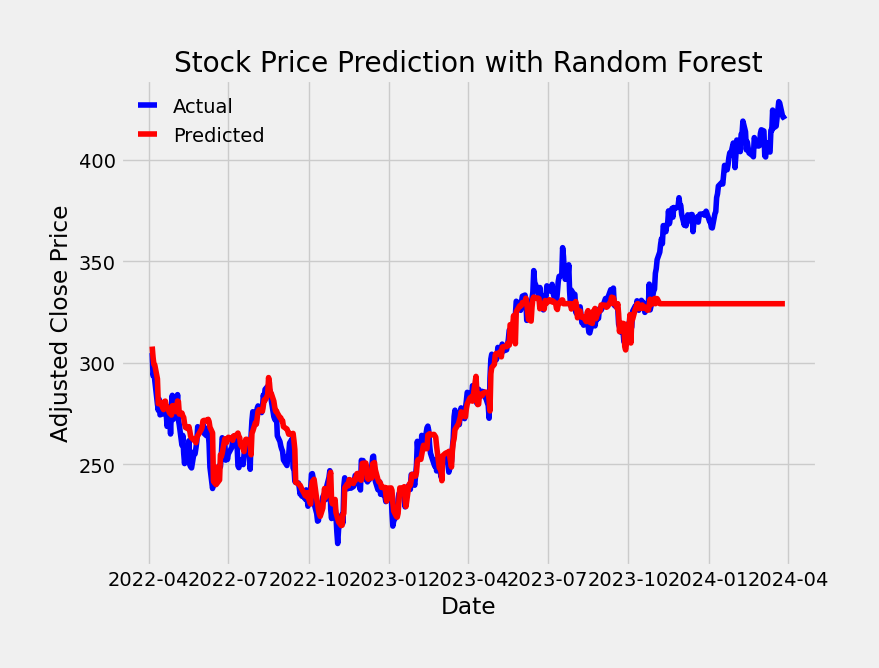

In [21]:
# Filter data for a specific stock, e.g., AAPL
stock_data = sp500_combined[sp500_combined['Symbol'] == 'MSFT']
stock_data = stock_data[['Date', 'Adj Close']]

# Convert 'Date' to datetime
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data.set_index('Date', inplace=True)

# Create lagged features and moving averages
def create_features(data, lags, moving_avg_windows):
    for lag in lags:
        data[f'lag_{lag}'] = data['Adj Close'].shift(lag)
    for window in moving_avg_windows:
        data[f'ma_{window}'] = data['Adj Close'].rolling(window=window).mean()
    data.dropna(inplace=True)
    return data

lags = [1, 5]  # Lagged features
moving_avg_windows = [5, 15, 30]  # Moving averages
stock_data = create_features(stock_data, lags, moving_avg_windows)

# Split data into features (X) and target (y)
X = stock_data.drop('Adj Close', axis=1)
y = stock_data['Adj Close']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)

# Initialize Random Forest with reasonable default parameters
model = RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(y_test.index, y_test, label='Actual', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.title('Stock Price Prediction with Random Forest')
plt.legend()
plt.show()

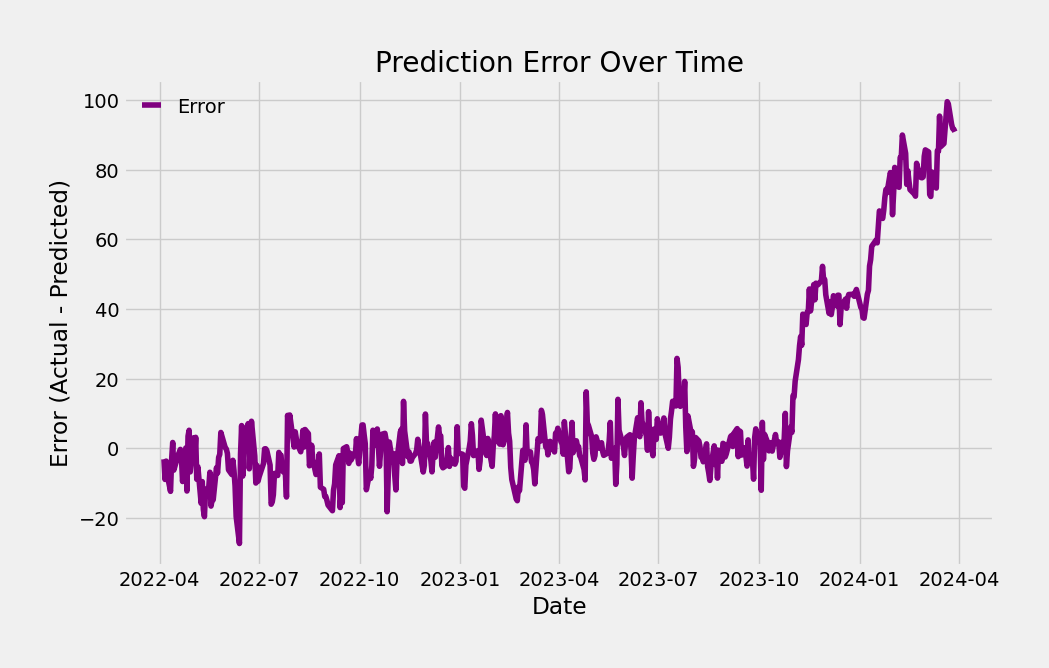

In [22]:
# Calculate the error
error = y_test - y_pred

# Plot the error over time
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, error, label='Error', color='purple')
plt.xlabel('Date')
plt.ylabel('Error (Actual - Predicted)')
plt.title('Prediction Error Over Time')
plt.legend()
plt.show()

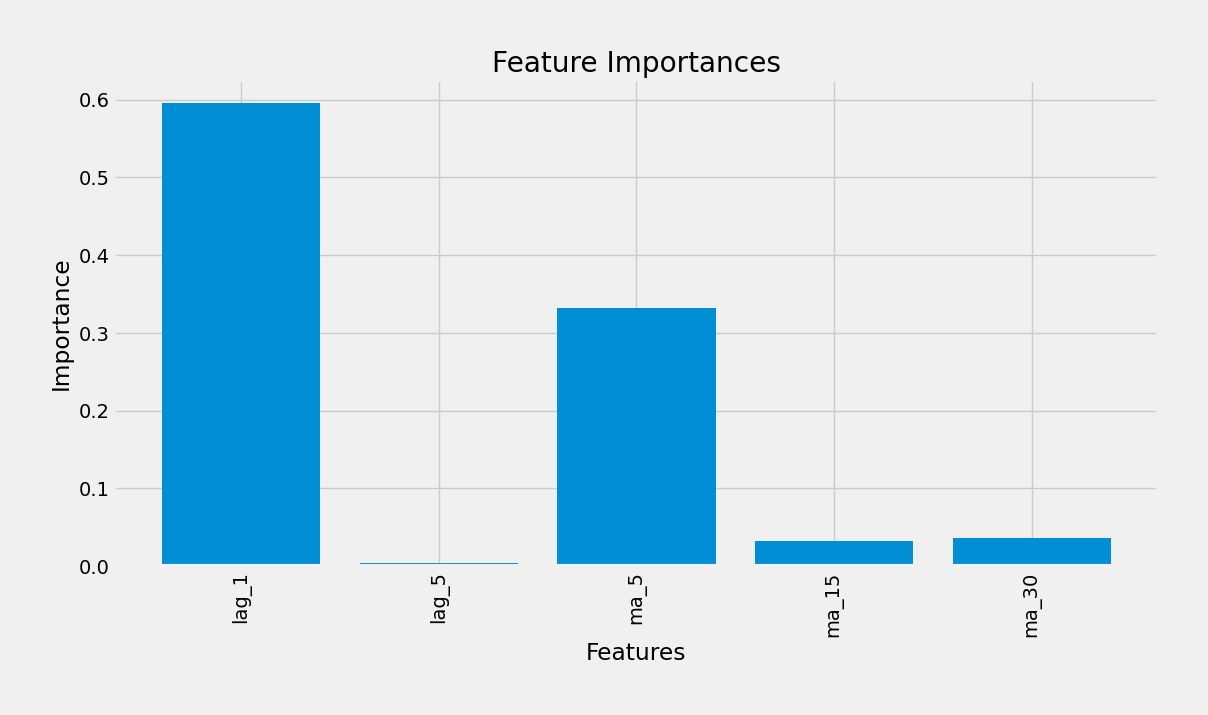

In [23]:
# Get feature importances from the model
feature_importances = model.feature_importances_
features = X.columns

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.bar(features, feature_importances)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=90)
plt.show()

In [24]:
for feature, importance in zip(features, feature_importances):
    print(f'{feature}: {importance:.6f}')

lag_1: 0.595129
lag_5: 0.003935
ma_5: 0.332443
ma_15: 0.032757
ma_30: 0.035736


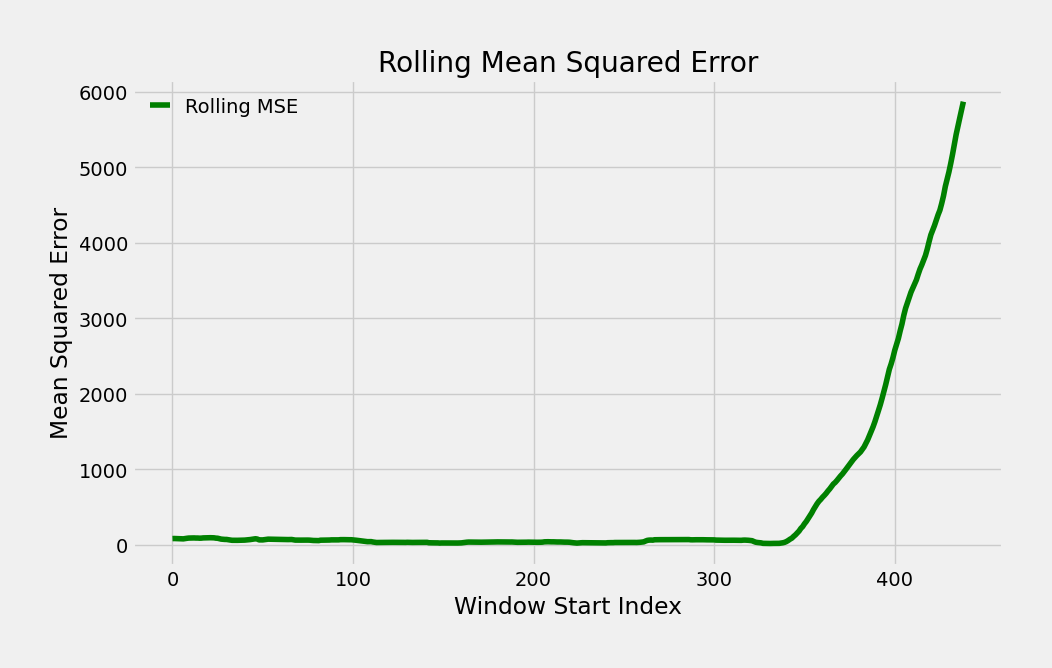

In [25]:
from sklearn.metrics import mean_squared_error

# Rolling window size
window_size = 60

# Initialize list to store rolling MSE
rolling_mse = []

# Evaluate model on a rolling basis
for start in range(0, len(X_test) - window_size + 1):
    end = start + window_size
    X_test_window = X_test[start:end]
    y_test_window = y_test[start:end]
    y_pred_window = model.predict(X_test_window)
    mse_window = mean_squared_error(y_test_window, y_pred_window)
    rolling_mse.append(mse_window)

# Plot rolling MSE
plt.figure(figsize=(10, 6))
plt.plot(range(len(rolling_mse)), rolling_mse, label='Rolling MSE', color='green')
plt.xlabel('Window Start Index')
plt.ylabel('Mean Squared Error')
plt.title('Rolling Mean Squared Error')
plt.legend()
plt.show()

### Long Short Term Memory
Long short-term memory model uses the power of deep learning which offers insights into the unpredictable nature of the stock market. Using deep learning to predict stock market prices.

In [26]:
# Load and name variable df for the database
sp500_10y = pd.read_csv("/Users/rtasseff/projects/tmp/data_analytics_v1/sp500_10y.csv")

df = sp500_10y
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1226068 entries, 0 to 1226067
Data columns (total 8 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Date       1226068 non-null  object 
 1   Open       1226068 non-null  float64
 2   High       1226068 non-null  float64
 3   Low        1226068 non-null  float64
 4   Close      1226068 non-null  float64
 5   Adj Close  1226068 non-null  float64
 6   Volume     1226068 non-null  float64
 7   Symbol     1226068 non-null  object 
dtypes: float64(6), object(2)
memory usage: 74.8+ MB


In [27]:
# Subset the database to show a company, example 3M

df2 = df[df['Symbol'] == 'CVX']
df2['Date'] = pd.to_datetime(df2['Date'])

# Set 'Date' column as the index
df2.set_index('Date', inplace=True)

/var/folders/gj/55jbh59n4zq928rw1mw6jpnc0000gn/T/ipykernel_66602/2761381868.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



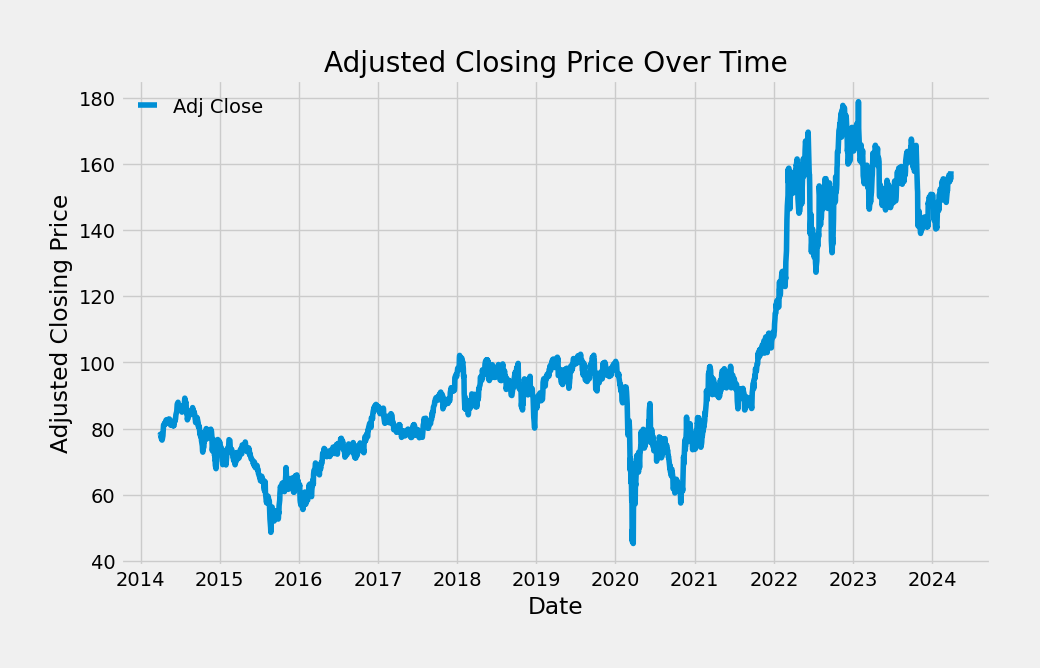

In [28]:
# Plot the Adjusted Closing price of the stock

plt.figure(figsize=(10, 6))
plt.plot(df2.index, df2['Adj Close'], label='Adj Close')
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price')
plt.title('Adjusted Closing Price Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [29]:
# Subset the dataframe to use the Adjusted Closing price for stock prediction

df3 = df2.reset_index()['Adj Close']
df3.head()

0    78.053154
1    78.282722
2    78.079414
3    77.921974
4    76.964340
Name: Adj Close, dtype: float64

In [30]:
# We are transforming our data so that it fits within the scale of 0 to 1 (0, 1)

scaler = MinMaxScaler()
df3 = scaler.fit_transform(np.array(df3).reshape(-1,1))
df3.shape

(2516, 1)

In [31]:
# Train-Test Split: 65% for training and 35% for testing

train_size = int(len(df3)*0.65)
test_size = len(df3) - train_size
train_data,test_data = df3[0:train_size,:],df3[train_size:len(df3),:1]


In [32]:
# splits the dataset into 2, based on the time step we take. The first dataset, dataX takes the values as its input
# the second dataset dataY takes teh values as output creating a dataset matrix from the above dataset

def create_dataset(dataset, time_step = 1):
    dataX,dataY = [],[]
    for i in range(len(dataset)-time_step-1):
                   a = dataset[i:(i+time_step),0]
                   dataX.append(a)
                   dataY.append(dataset[i + time_step,0])
    return np.array(dataX),np.array(dataY)

In [33]:
# calling the create dataset function to split the data into
# input output datasets with time step 100 - time step allows the LSTM network to remember the facts in the past.
# If timestep = 1 then the LSTM remembers the last price and forgets the previous ones, when increased, it can remember earlier events

time_step = 100 #100 adjusted closing prices
X_train,Y_train =  create_dataset(train_data,time_step)
X_test,Y_test =  create_dataset(test_data,time_step)


In [34]:
# checking values

print(X_train.shape)
print(X_train)
print(X_test.shape)
print(Y_test.shape)

(1534, 100)
[[0.24535423 0.24707484 0.24555105 ... 0.2985136  0.29781375 0.30001383]
 [0.24707484 0.24555105 0.24437104 ... 0.29781375 0.30001383 0.29591365]
 [0.24555105 0.24437104 0.2371936  ... 0.30001383 0.29591365 0.29956364]
 ...
 [0.23666633 0.22062967 0.23315838 ... 0.16838052 0.16464075 0.15232516]
 [0.22062967 0.23315838 0.24224152 ... 0.16464075 0.15232516 0.14736022]
 [0.23315838 0.24224152 0.2244508  ... 0.15232516 0.14736022 0.12427667]]
(780, 100)
(780,)


In [35]:
# creating and fitting the LSTM Model

model = Sequential()
model.add(LSTM(50,return_sequences = True,input_shape = (X_train.shape[1],1)))
model.add(LSTM(50,return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error',optimizer = 'adam')

# We have 4 layers of LSTM with 1 as input layer, 2 as hidden layers and 1 output layer as Dense, using the Adam Optimizer and calculating mean squared error

2024-11-26 12:19:21.246364: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-11-26 12:19:21.247102: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-11-26 12:19:21.247643: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.fit(X_train,Y_train,validation_data = (X_test,Y_test),epochs = 100,batch_size = 64,verbose = 1)
#training the model for 100 epochs with a batch size of 64 each

Epoch 1/100


2024-11-26 12:19:30.302845: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-11-26 12:19:30.457999: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-11-26 12:19:30.458561: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-11-26 12:19:30.459150: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG IN

24/24 [==============================] - ETA: 0s - loss: 0.0101

2024-11-26 12:19:33.907004: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-11-26 12:19:33.907510: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-11-26 12:19:33.907980: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

24/24 [==============================] - 4s 101ms/step - loss: 0.0101 - val_loss: 0.0177
Epoch 2/100
24/24 [==============================] - 2s 84ms/step - loss: 0.0017 - val_loss: 0.0130
Epoch 3/100
24/24 [==============================] - 2s 90ms/step - loss: 9.1684e-04 - val_loss: 0.0029
Epoch 4/100
24/24 [==============================] - 2s 86ms/step - loss: 8.3513e-04 - val_loss: 0.0028
Epoch 5/100
24/24 [==============================] - 2s 90ms/step - loss: 7.9702e-04 - val_loss: 0.0027
Epoch 6/100
24/24 [==============================] - 2s 90ms/step - loss: 7.5894e-04 - val_loss: 0.0024
Epoch 7/100
24/24 [==============================] - 2s 97ms/step - loss: 7.0187e-04 - val_loss: 0.0022
Epoch 8/100
24/24 [==============================] - 2s 90ms/step - loss: 7.0250e-04 - val_loss: 0.0021
Epoch 9/100
24/24 [==============================] - 2s 90ms/step - loss: 6.6334e-04 - val_loss: 0.0020
Epoch 10/100
24/24 [==============================] - 2s 89ms/step - loss: 5.9161e-

In [40]:
# Prediction and checking performance matrix

train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

2024-10-08 12:09:38.310138: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-10-08 12:09:38.310780: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-10-08 12:09:38.311409: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

25/25 [==============================] - 0s 12ms/step


In [41]:
# transform to original form - we need to unscale so we have an actual dollar amount
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [38]:
print(math.sqrt(mean_squared_error(Y_train,train_predict)))
print(math.sqrt(mean_squared_error(Y_test,test_predict)))


NameError: name 'train_predict' is not defined

In [43]:
#Plotting the results

look_back = 100

# Lookback variable takes the number of values behind the current value i.e; remembering the previous 100 values which is the same as the time step in LSTM
# While plotting the graph, the trainPredictPlot will take 100 values behind them and plot it. The plotting goes from previous 100th value and goes until the length of the lookback

In [44]:
trainPredictPlot = np.empty_like(df3)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back : len(train_predict)+look_back,:] = train_predict

In [45]:
testPredictPlot = np.empty_like(df3)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict)+(look_back)*2 + 1 : len(df3) - 1,:] = test_predict
#takes the values next to the train_predict, lookback will start from where the train predict ends

In [46]:
test_predict
#last value in the array is the stock prediction 100 days out: $87.53


array([[ 84.83328 ],
       [ 86.92046 ],
       [ 88.66832 ],
       [ 91.475395],
       [ 91.46805 ],
       [ 89.13564 ],
       [ 90.23818 ],
       [ 91.49584 ],
       [ 92.22975 ],
       [ 92.8494  ],
       [ 96.48192 ],
       [ 97.99288 ],
       [ 97.36251 ],
       [ 98.763275],
       [ 99.305855],
       [ 99.35608 ],
       [ 98.21864 ],
       [ 95.76661 ],
       [ 95.79935 ],
       [ 92.85054 ],
       [ 91.2453  ],
       [ 90.782   ],
       [ 90.23909 ],
       [ 92.27195 ],
       [ 93.148796],
       [ 94.85828 ],
       [ 94.87442 ],
       [ 93.86672 ],
       [ 92.96521 ],
       [ 93.869194],
       [ 93.17107 ],
       [ 91.88904 ],
       [ 92.29659 ],
       [ 91.655045],
       [ 91.166374],
       [ 90.28316 ],
       [ 90.49435 ],
       [ 92.36108 ],
       [ 92.013016],
       [ 91.12356 ],
       [ 91.44044 ],
       [ 90.202644],
       [ 90.86273 ],
       [ 89.92021 ],
       [ 89.86215 ],
       [ 90.093346],
       [ 91.02408 ],
       [ 93.2

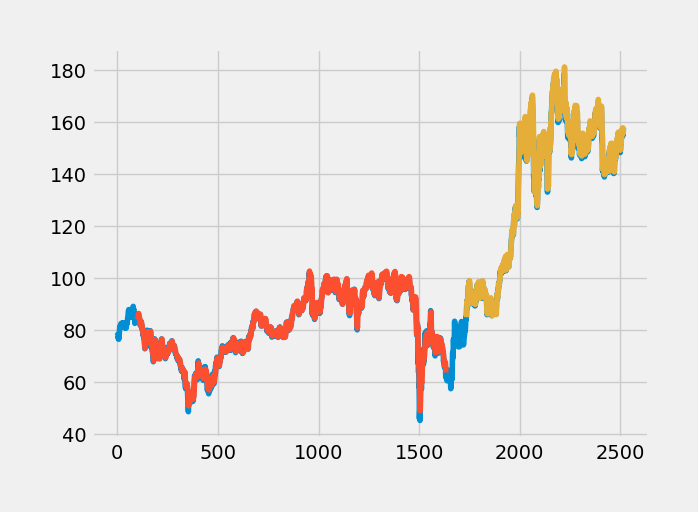

In [44]:
plt.plot(scaler.inverse_transform(df3))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

The orange is the TrainPredictPlot, green is the TestPredictPlot and the blue is the actual data set. The model closely follows the blue and has predicted the sock prices very well. 100 is the lookback so it is predicting the next 100 days. This is a great model for predicting short term stock prices.

### Geometric Brownian Motion (Random Walk) and price predictions

This model simultes the future distribution of stock prices using a stochastic process. Using a statistical approach in predicting stock prices from historical data.

A stochastic process is a mathematical equation that creates a series of outcomes over time using timeseries data with outcomes that are not deterministic (we do not know) by how much a stock will increase or decrease over time.

Stochastic simulation creates the possible pathways a stock price can go, obtain a statistical sampling of these possible pathways and makes guesses on the potential pathway that the price might take based on the volatility over time.

The Monte Carlo simulation takes the real-world valuation that stocks must grow on average at a higher rate than a risk-free asset (bonds, savings accounts).

In [45]:
df2.head()

df4 = df[df['Symbol'] == 'CVX']
df4['Date'] = pd.to_datetime(df4['Date'])

# Set 'Date' column as the index
df4.reset_index


/var/folders/gj/55jbh59n4zq928rw1mw6jpnc0000gn/T/ipykernel_33879/2259539457.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<bound method DataFrame.reset_index of              Date        Open        High         Low       Close   Adj Close  \
253193 2014-04-01  119.150002  119.610001  118.839996  119.000000   78.053154   
253194 2014-04-02  118.519997  119.540001  118.519997  119.349998   78.282722   
253195 2014-04-03  119.779999  119.790001  118.889999  119.040001   78.079414   
253196 2014-04-04  119.750000  119.750000  118.589996  118.800003   77.921974   
253197 2014-04-07  118.320000  118.820000  117.339996  117.339996   76.964340   
...           ...         ...         ...         ...         ...         ...   
255704 2024-03-22  155.080002  155.279999  154.160004  154.660004  154.660004   
255705 2024-03-25  155.479996  157.309998  155.270004  156.470001  156.470001   
255706 2024-03-26  156.520004  156.860001  154.649994  155.270004  155.270004   
255707 2024-03-27  154.869995  156.440002  154.850006  156.350006  156.350006   
255708 2024-03-28  157.149994  158.190002  156.369995  157.740005  157

In [46]:
df4.head()

Date        Open        High         Low       Close  Adj Close  \
253193 2014-04-01  119.150002  119.610001  118.839996  119.000000  78.053154   
253194 2014-04-02  118.519997  119.540001  118.519997  119.349998  78.282722   
253195 2014-04-03  119.779999  119.790001  118.889999  119.040001  78.079414   
253196 2014-04-04  119.750000  119.750000  118.589996  118.800003  77.921974   
253197 2014-04-07  118.320000  118.820000  117.339996  117.339996  76.964340   

           Volume Symbol  
253193  5391400.0    CVX  
253194  4505600.0    CVX  
253195  4446400.0    CVX  
253196  5301300.0    CVX  
253197  5241300.0    CVX

In [47]:
print(df4.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Symbol'],
      dtype='object')


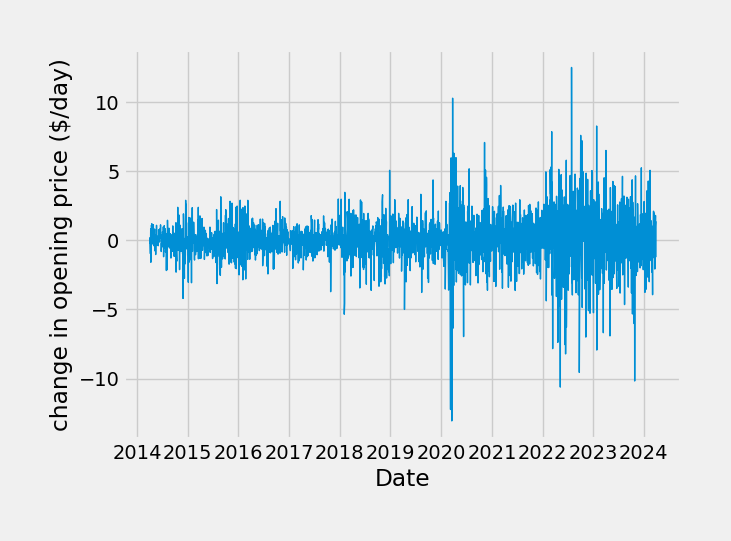

In [48]:
dprice = np.diff(df4['Adj Close'])
plt.plot(df4['Date'][1:], dprice, linewidth=1)
plt.xlabel('Date')
plt.ylabel('change in opening price (\$/day)');

In [49]:
mean_dprice = np.mean(dprice)
std_dprice = np.std(dprice)
x = np.linspace(-40, 40)
from scipy import stats
price_pdf = stats.norm.pdf(x, loc = mean_dprice, scale = std_dprice)

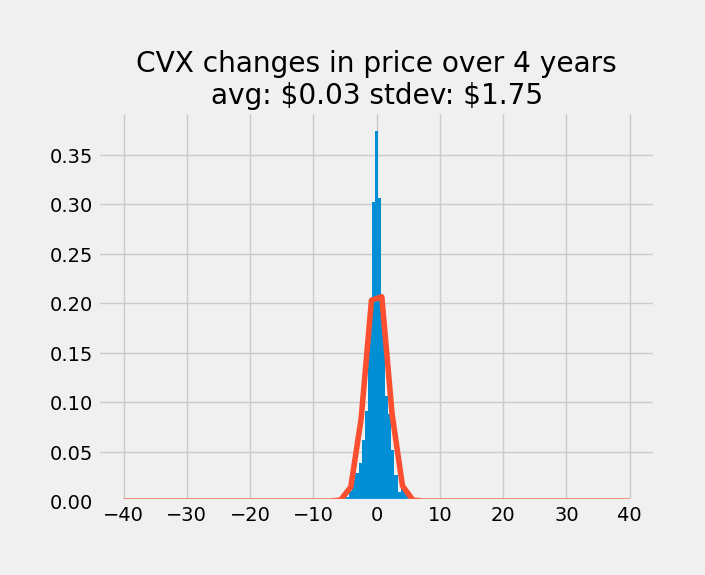

In [50]:
plt.hist(dprice, 50, density=True)
plt.plot(x, price_pdf)
plt.title('CVX changes in price over 4 years\n'+
         'avg: \${:.2f} stdev: \${:.2f}'.format(mean_dprice, std_dprice));

Follows a normal distibution, with average change of .06 and standard deviation of 1.83

/var/folders/gj/55jbh59n4zq928rw1mw6jpnc0000gn/T/ipykernel_33879/1906339865.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



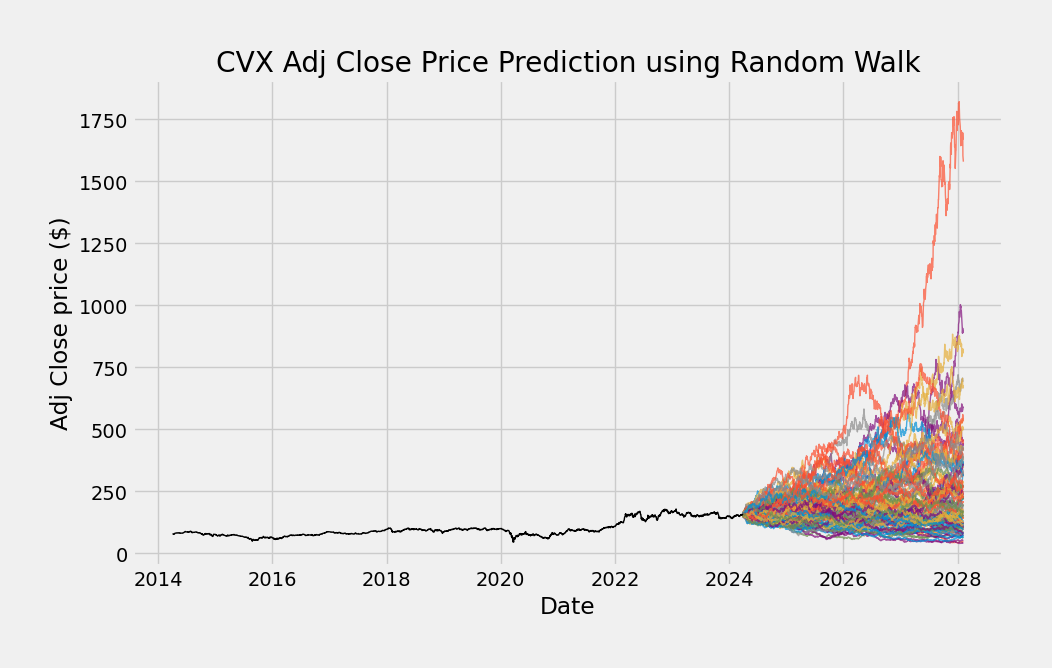

In [51]:
df4['Date'] = pd.to_datetime(df4['Date'])
df4 = df4.sort_values('Date')

# Parameters
N_years = 4
trading_days_per_year = 252  # Approximate number of trading days in a year
N_days = N_years * trading_days_per_year

# Fit the random walk model
last_price = df4['Adj Close'].iloc[-1]
returns = df4['Adj Close'].pct_change().dropna()  # Calculate daily returns
mean_return = returns.mean()
std_return = returns.std()

# Generate future predictions using a random walk
rng = default_rng(42)
fig, ax = plt.subplots(figsize=(10, 6))

for i in range(100):  # Change this number to plot more or fewer model predictions
    future_returns = rng.normal(loc=mean_return, scale=std_return, size=N_days)
    future_prices = last_price * (1 + future_returns).cumprod()
    future_dates = pd.date_range(start=df4['Date'].iloc[-1], periods=N_days, freq='B')

    # Plot each model's prediction
    ax.plot(future_dates, future_prices, label=f'Model {i+1}', linewidth=1, alpha=.7)

# Plot historical data
ax.plot(df4['Date'], df4['Adj Close'], color='black', label='Historical data', linewidth=1)

# Customize plot
ax.set_title('CVX Adj Close Price Prediction using Random Walk')
ax.set_xlabel('Date')
ax.set_ylabel('Adj Close price ($)')
#ax.legend()
ax.grid(True)

# Show plot
plt.show()

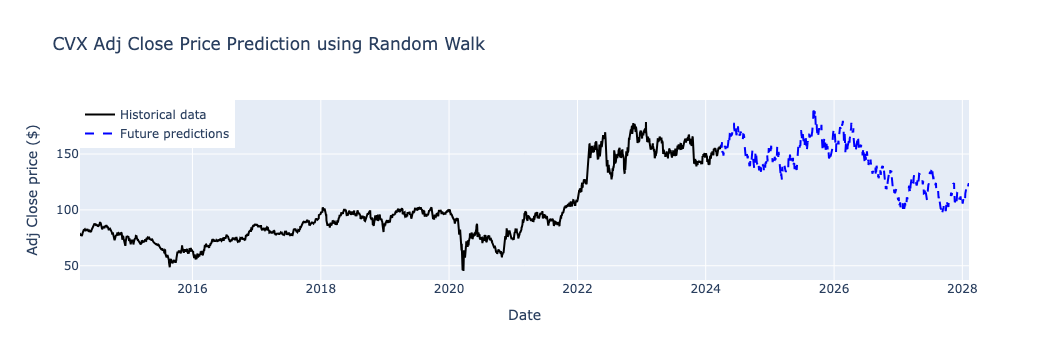

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from numpy.random import default_rng

# Assume df4 is your DataFrame containing the historical 'Adj Close' prices for Apple
# df4 should have a 'Date' column and an 'Adj Close' column
# Ensure 'Date' is in datetime format
df4['Date'] = pd.to_datetime(df4['Date'])
df4 = df4.sort_values('Date')

# Parameters
N_years = 4
trading_days_per_year = 252  # Approximate number of trading days in a year
N_days = N_years * trading_days_per_year

# Fit the random walk model
last_price = df4['Adj Close'].iloc[-1]
returns = df4['Adj Close'].pct_change().dropna()  # Calculate daily returns
mean_return = returns.mean()
std_return = returns.std()

# Generate future predictions using a random walk
rng = default_rng(42)
future_returns = rng.normal(loc=mean_return, scale=std_return, size=N_days)
future_prices = last_price * (1 + future_returns).cumprod()

# Create future dates
last_date = df4['Date'].iloc[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=N_days, freq='B')

# Create a DataFrame for future predictions
future_df = pd.DataFrame({'Date': future_dates, 'Adj Close': future_prices})

# Combine historical and future data
combined_df = pd.concat([df4, future_df])

# Create an interactive Plotly figure
fig = make_subplots()

# Add historical data
fig.add_trace(go.Scatter(
    x=df4['Date'],
    y=df4['Adj Close'],
    mode='lines',
    name='Historical data',
    line=dict(color='black')
))

# Add future predictions
fig.add_trace(go.Scatter(
    x=future_df['Date'],
    y=future_df['Adj Close'],
    mode='lines',
    name='Future predictions',
    line=dict(color='blue', dash='dash')
))

# Update the layout
fig.update_layout(
    title='CVX Adj Close Price Prediction using Random Walk',
    xaxis_title='Date',
    yaxis_title='Adj Close price ($)',
    legend=dict(x=0, y=1),
    hovermode='x unified'
)

# Show the plot
fig.show()
